In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### EDA

In [64]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
df.duplicated().sum()
df.isnull().sum()
# -> không có missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [68]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

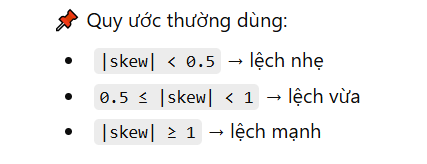

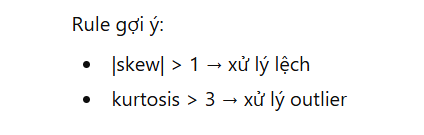

#### Trực quan biến mục tiêu
- Phân phối lệch phải mạnh, mean >> std -> log transform target
- Nhiều outlier -> cần xử lý? , tree models based tốt hơn?

Skewness = 4.024069144684714 -> Cần log transform
Kurtosis = 34.585540431942434 -> Có nhiều oulier


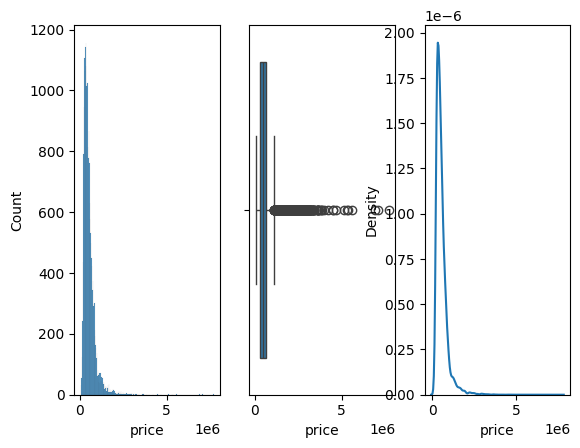

<Figure size 1200x1000 with 0 Axes>

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3)

plt.figure(figsize=(12, 10))
sns.histplot(df, x="price", ax=axes[0])
sns.boxplot(df, x="price", ax=axes[1])
sns.kdeplot(df, x="price", ax=axes[2])

# dùng pandas
if df["price"].skew() > 1:
    print(f'Skewness = {df["price"].skew()} -> Cần log transform')

if df["price"].kurtosis() > 3:
    print(f'Kurtosis = {df["price"].kurtosis()} -> Có nhiều oulier')

#### Trực quan đơn biến

##### Biến categorical: 4 biến
> Mục đích: quyết định cách encoding, phát hiện imbalanced, cần grouping ?

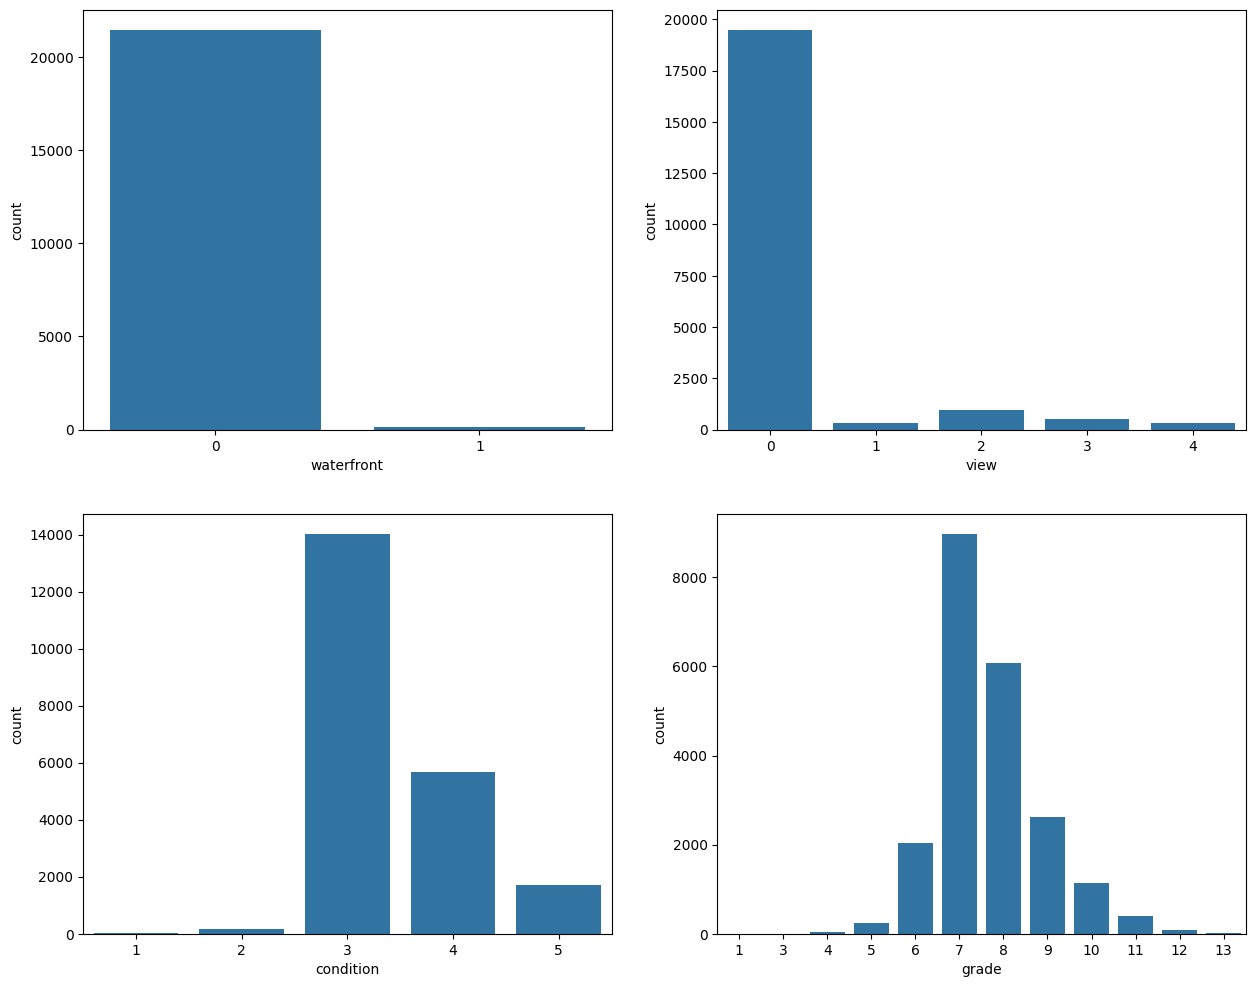

In [70]:
categories_columns = ["waterfront", "view", "condition", "grade"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categories_columns):
    sns.countplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)


##### Biến numerical: 10 biến
> Mục đích: xử lý oulier, lệch chuẩn, scaling ?

,Name column,Skewness,Kurtosis
0,sqft_lot,13.060019,285.077820
1,sqft_lot15,9.506743,150.763110
2,bedrooms,1.974300,49.063653
3,sqft_basement,1.577965,2.715574
4,sqft_living,1.471555,5.243093
5,sqft_above,1.446664,3.402304
6,sqft_living15,1.108181,1.597096
7,floors,0.616177,-0.484723
8,bathrooms,0.511108,1.279902
9,yr_built,-0.469805,-0.657408


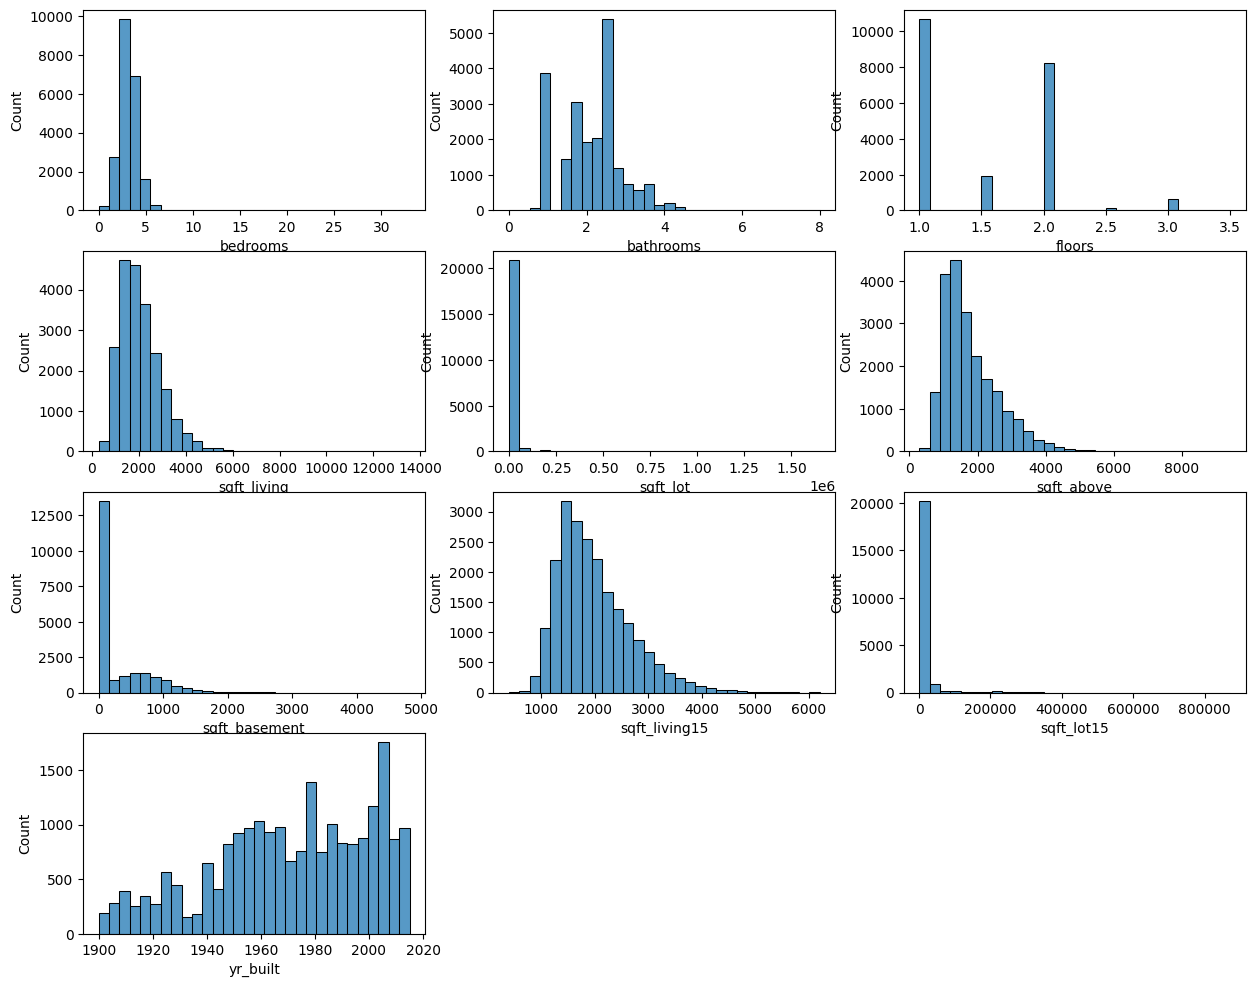

In [71]:
numerical_columns = ["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built"]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=30)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

skewness= {}
kurtosis= {}
for col in numerical_columns:
    skewness[col] = float(df[col].skew())
    kurtosis[col] = float(df[col].kurtosis())

skew_sorted = sorted(skewness.items(), key=lambda x : x[1], reverse=True)
kurtosis_sorted = sorted(kurtosis.items(), key=lambda x : x[1], reverse=True)
dfs = pd.DataFrame(skew_sorted, columns=["Name column", "Skewness"])
dfk = pd.DataFrame(kurtosis_sorted, columns=["Name column", "Kurtosis"])

dfsk = dfs.merge(dfk, on="Name column", how="left")
dfsk


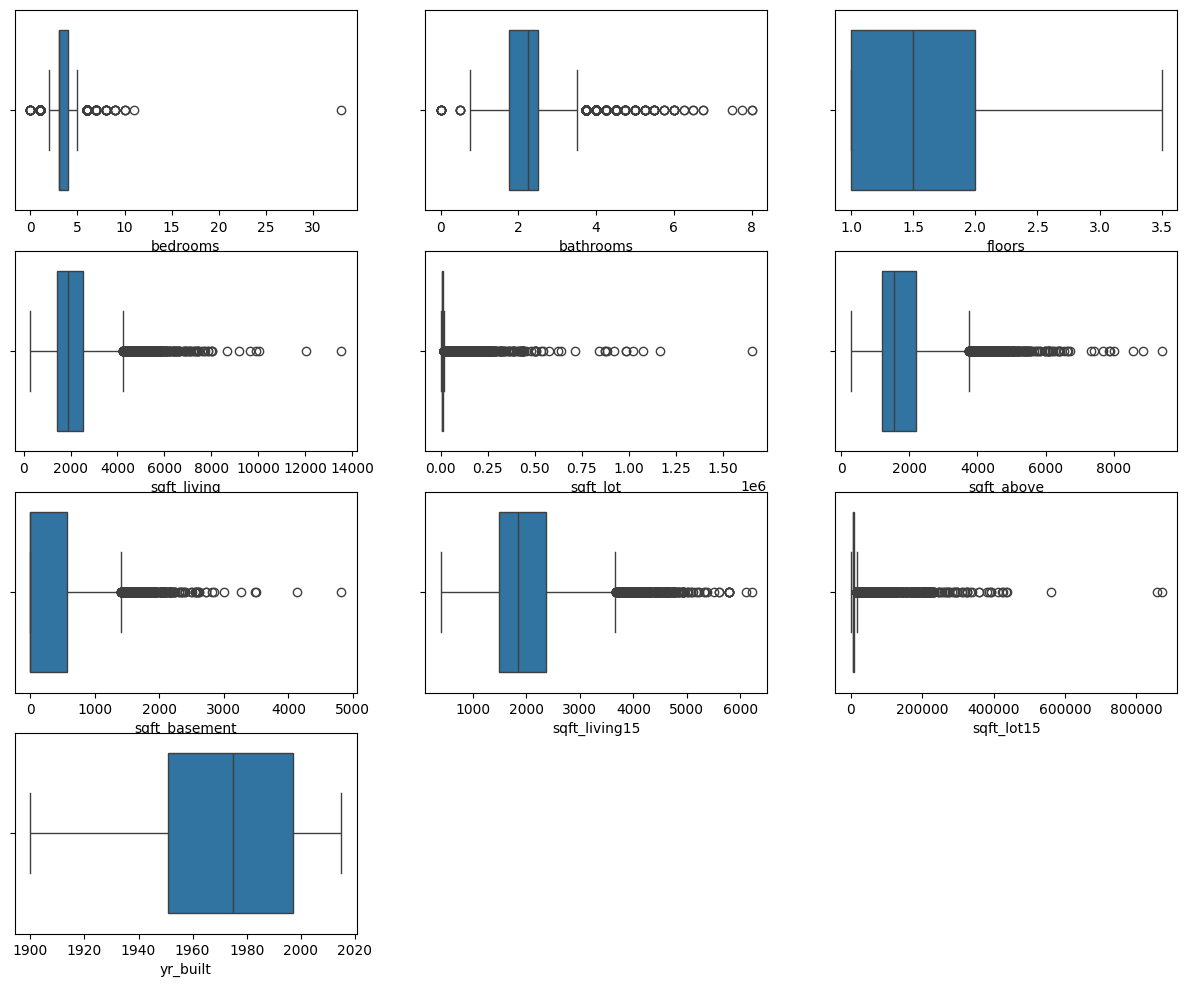

In [72]:
numerical_columns = ["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built"]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

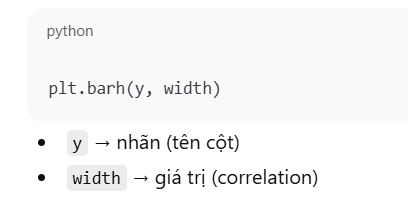

##### Trực quan mối quan hệ đa biến
> Mục đích: tìm features có tương quan cao với target?

<BarContainer object of 18 artists>

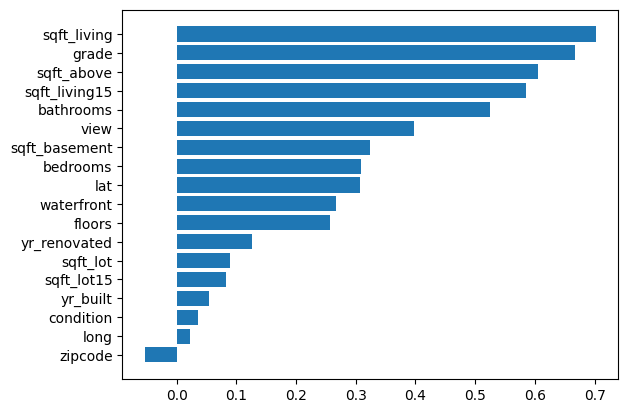

In [73]:
columns = df.columns.drop(['id', 'date'])

corr_with_columns = df[columns].corr()['price'].sort_values().drop('price')
plt.barh(corr_with_columns.index, corr_with_columns.values)


<Axes: xlabel='long', ylabel='lat'>

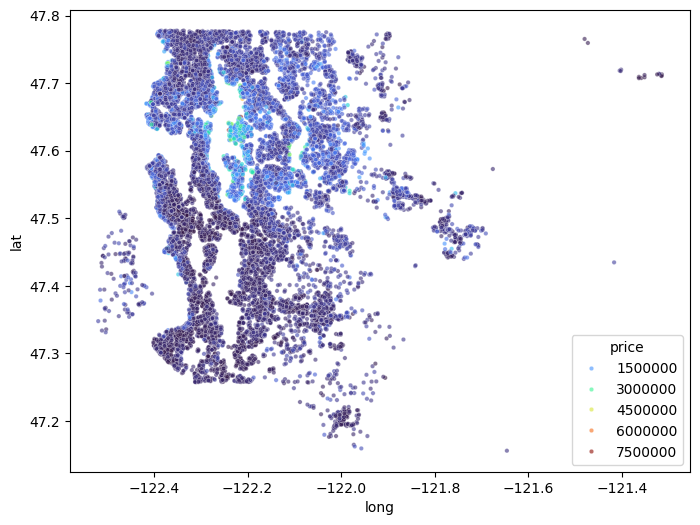

In [74]:

plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="turbo", alpha=0.6, s=10)


- Mục đích: tìm các features có độ tương quan lớn với nhau Multicollinearity (đa cộng tuyến)
- Nghĩa là một feature có thể được “đoán” khá chính xác từ feature khác.
- Nhìn vào heapmap thấy sqfl_above và sqft_living có độ tương quan cao (~0.9) -> cần xử lý

<Axes: >

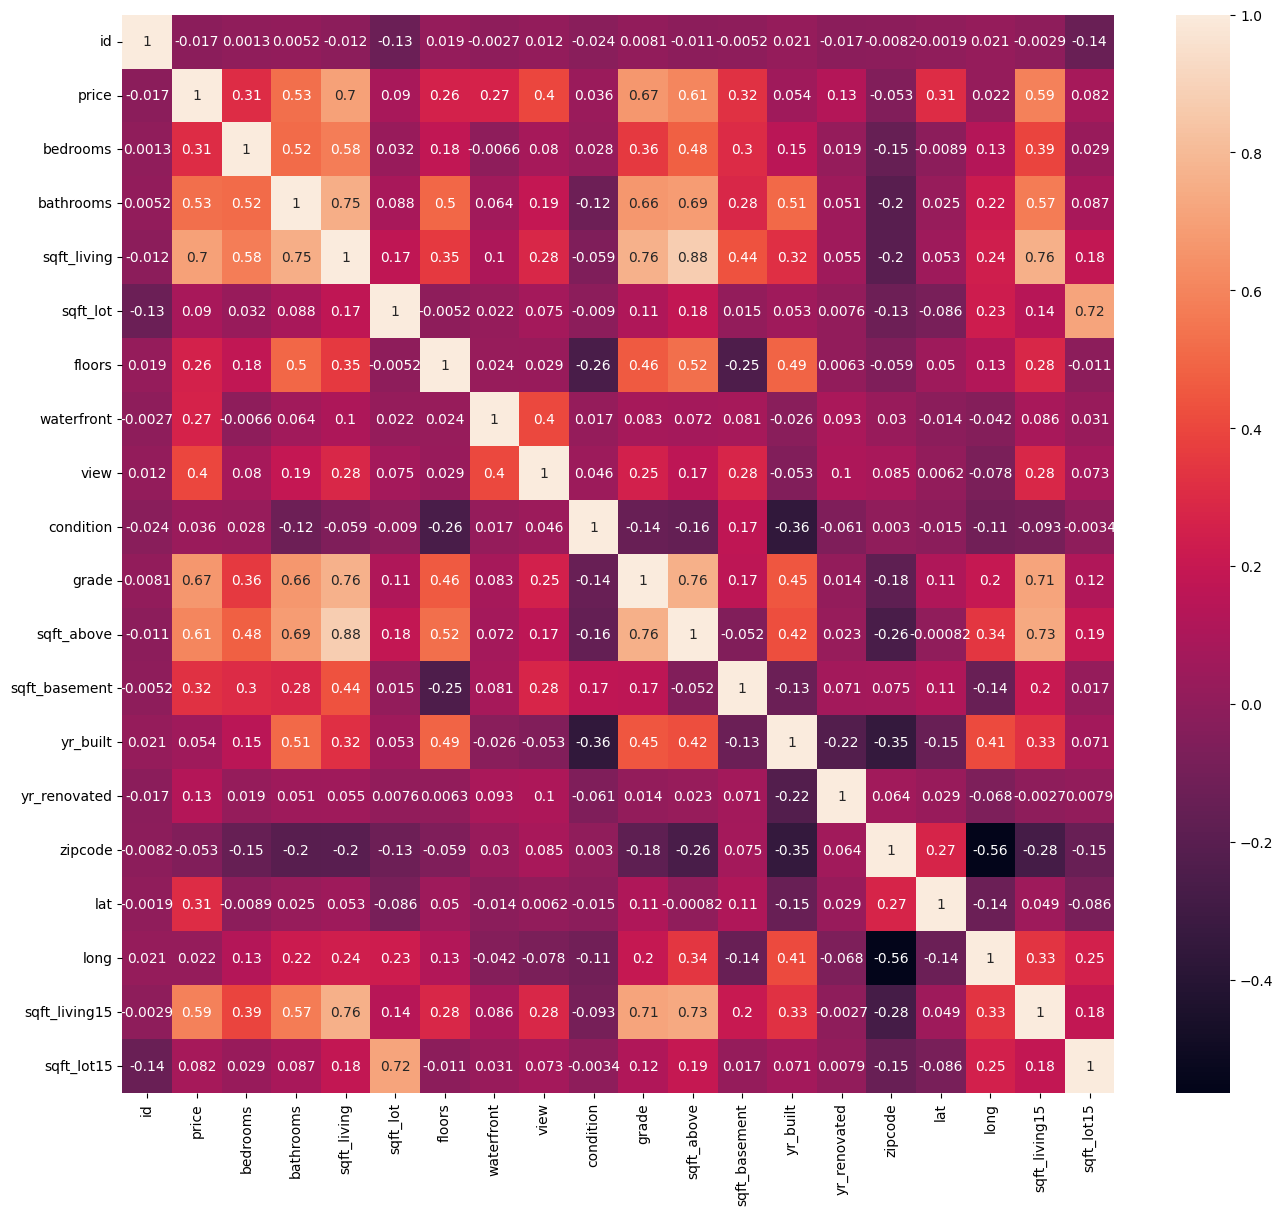

In [75]:
plt.figure(figsize=(16, 14))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

##### Trực quan mqh target và biến quan trọng


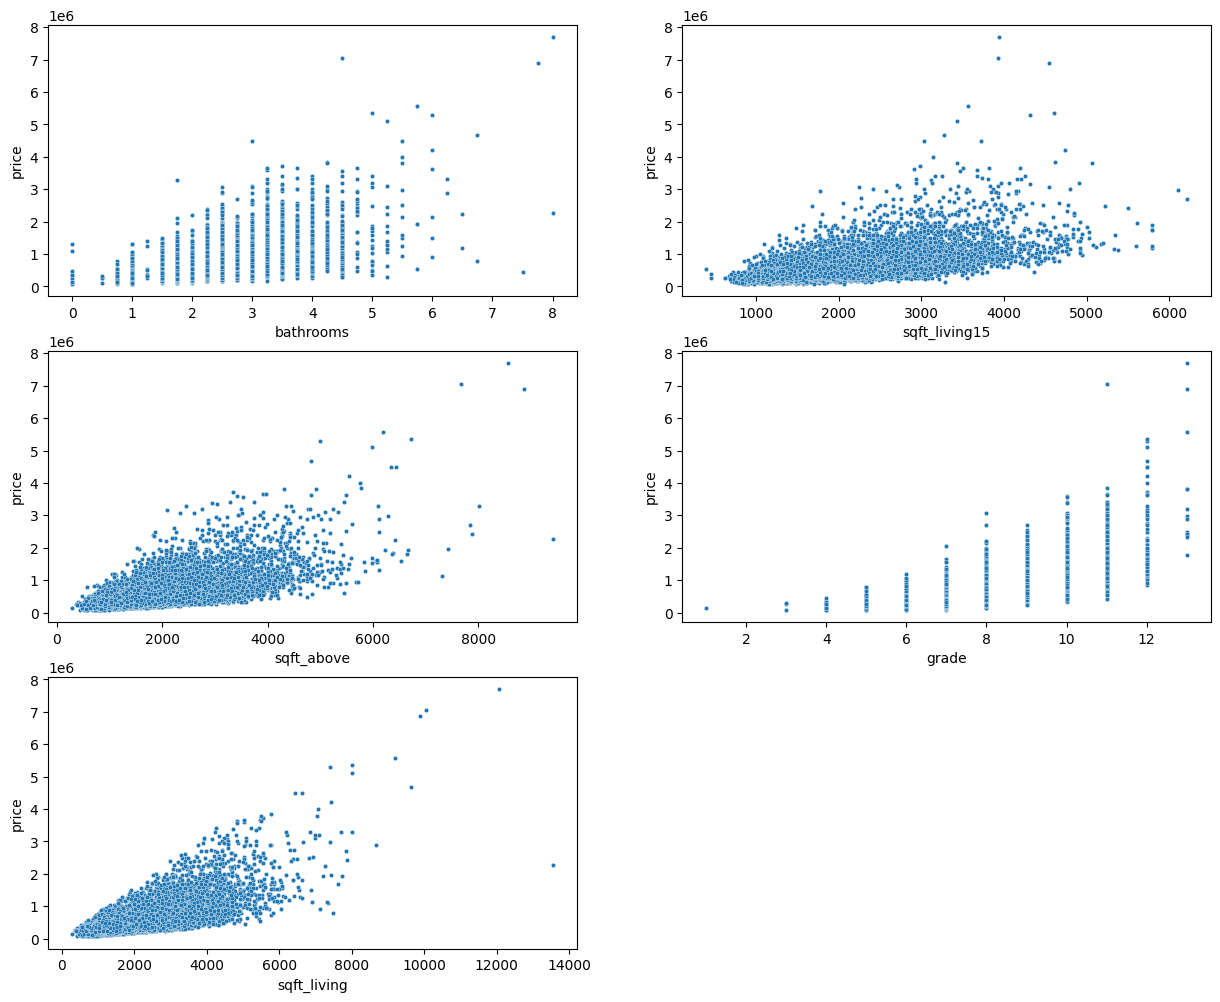

In [76]:

top_corr_with_columns = corr_with_columns[corr_with_columns.values > 0.5]
tops = list(top_corr_with_columns.index)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15, 12))
axes = axes.flatten()

for i, col in enumerate(tops):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], s=10)

for j in range(i+ 1, len(axes)):
    axes[j].set_visible(False)

# có mối quan hệ tuyến tính với biết target


### Data Cleaning & Feature Engineering

In [77]:
# Xóa missing value -> không có
# Xóa duplicate ->

df["price"].skew()

np.float64(4.024069144684714)

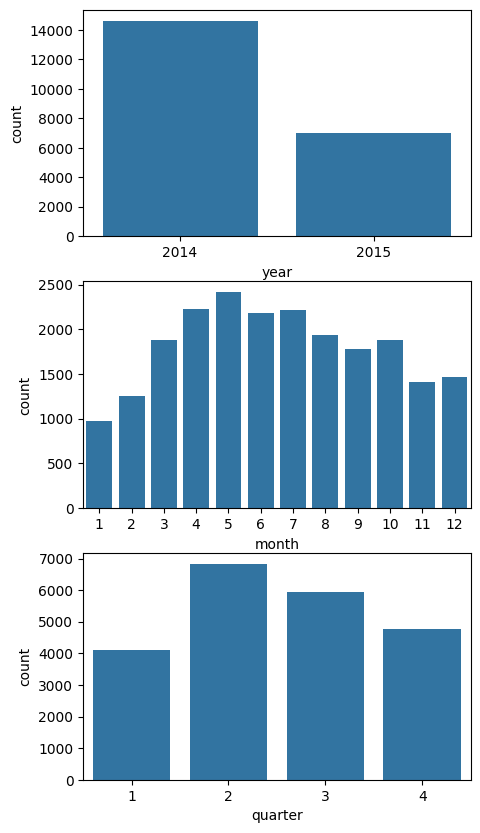

In [78]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
axes =axes.flatten()

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

date_columns = ['year', 'month', 'quarter']

for i, col in enumerate(date_columns):
    sns.countplot(df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

- Giá trung bình tính theo từng năm, tháng, quý đều xấp xí gần nhau
- Thời gian bán ngôi nhà gần như không ảnh hưởng đến giá bán
- Có thể loại bỏ cột date (year, month, quarter)

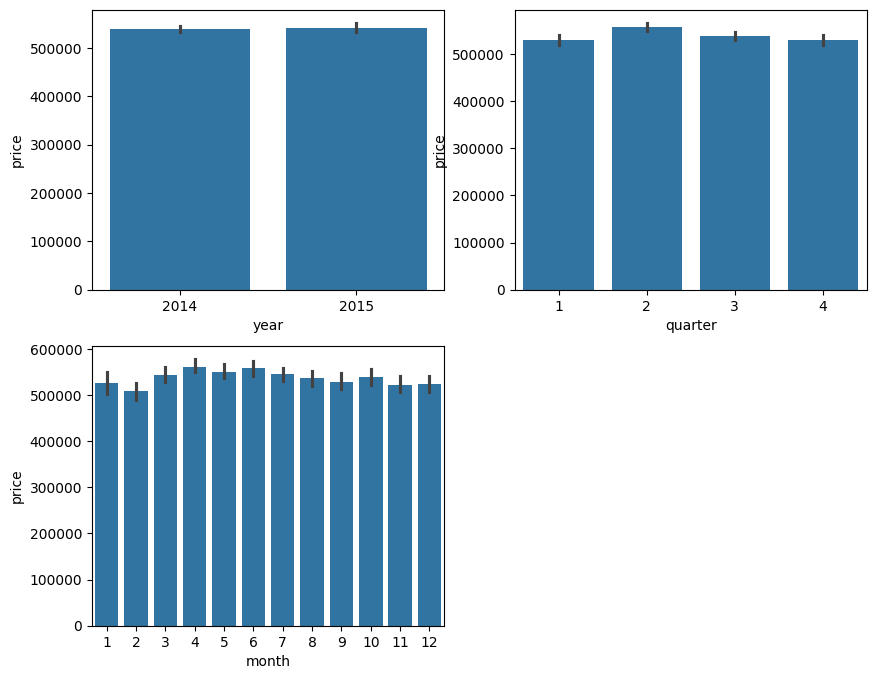

In [79]:

dates = ['year', 'quarter', 'month']

fig, axes = plt.subplots(2, 2, figsize = (10, 8))
axes = axes.flatten()

for i, col in enumerate(dates):
    sns.barplot(df, x=col, y='price', estimator='mean', ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)


<Axes: xlabel='is_renovated', ylabel='count'>

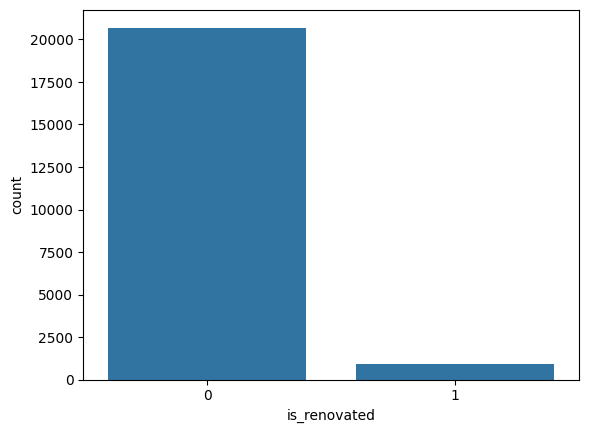

In [80]:
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
                   
sns.countplot(df, x='is_renovated')

- Nhà đã cải tạo thường có giá cao hơn (giá trung bình cao hơn)

<Axes: xlabel='is_renovated', ylabel='price'>

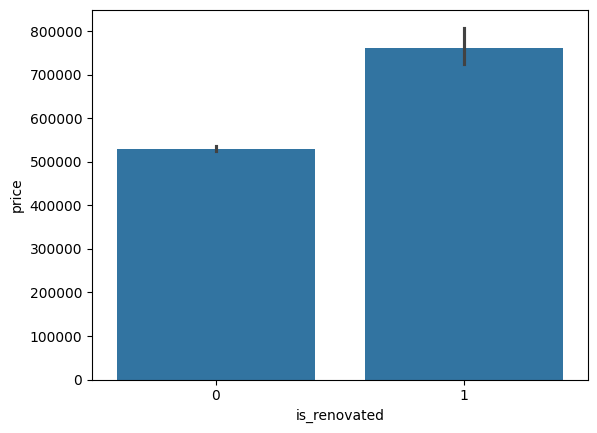

In [81]:
sns.barplot(df, x='is_renovated', y='price', estimator='mean')

In [82]:
df.drop(columns=["id", "date", "yr_renovated", "zipcode", "year", "month", "quarter"], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287,0


<Axes: xlabel='log_price', ylabel='Count'>

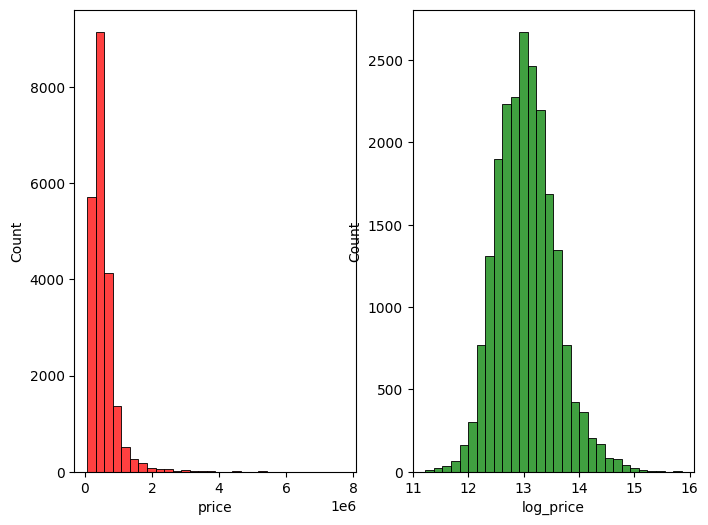

In [83]:
df["log_price"] = np.log1p(df["price"])

fig, axes = plt.subplots(1, 2, figsize = (8, 6))

sns.histplot(df, x="price", ax=axes[0], bins=30, color='red')
sns.histplot(df, x="log_price", ax=axes[1], bins=30, color='green')

In [84]:
df_high_skewness = dfsk[dfsk["Skewness"] > 1]
df_high_skewness

for col in list(df_high_skewness["Name column"]):
    log_name = "log_" + col
    df[log_name] = np.log1p(df[col])

df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,is_renovated,log_price,log_sqft_lot,log_sqft_lot15,log_bedrooms,log_sqft_basement,log_sqft_living,log_sqft_above,log_sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,5650,0,12.309987,8.639588,8.639588,1.386294,0.000000,7.074117,7.074117,7.201171
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,7639,1,13.195616,8.887791,8.941153,1.386294,5.993961,7.852050,7.682943,7.433075
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,8062,0,12.100718,9.210440,8.995041,1.098612,0.000000,6.647688,6.647688,7.908755
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,5000,0,13.311331,8.517393,8.517393,1.609438,6.814543,7.581210,6.957497,7.215975
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,7503,0,13.142168,8.997271,8.923191,1.386294,0.000000,7.427144,7.427144,7.496097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,1509,0,12.793862,7.031741,7.319865,1.386294,0.000000,7.333676,7.333676,7.333676
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,7200,0,12.899222,8.668024,8.881975,1.609438,0.000000,7.745436,7.745436,7.512618
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2007,0,12.904461,7.208600,7.604894,1.098612,0.000000,6.928538,6.928538,6.928538
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,1287,0,12.899222,7.778630,7.160846,1.386294,0.000000,7.378384,7.378384,7.252054


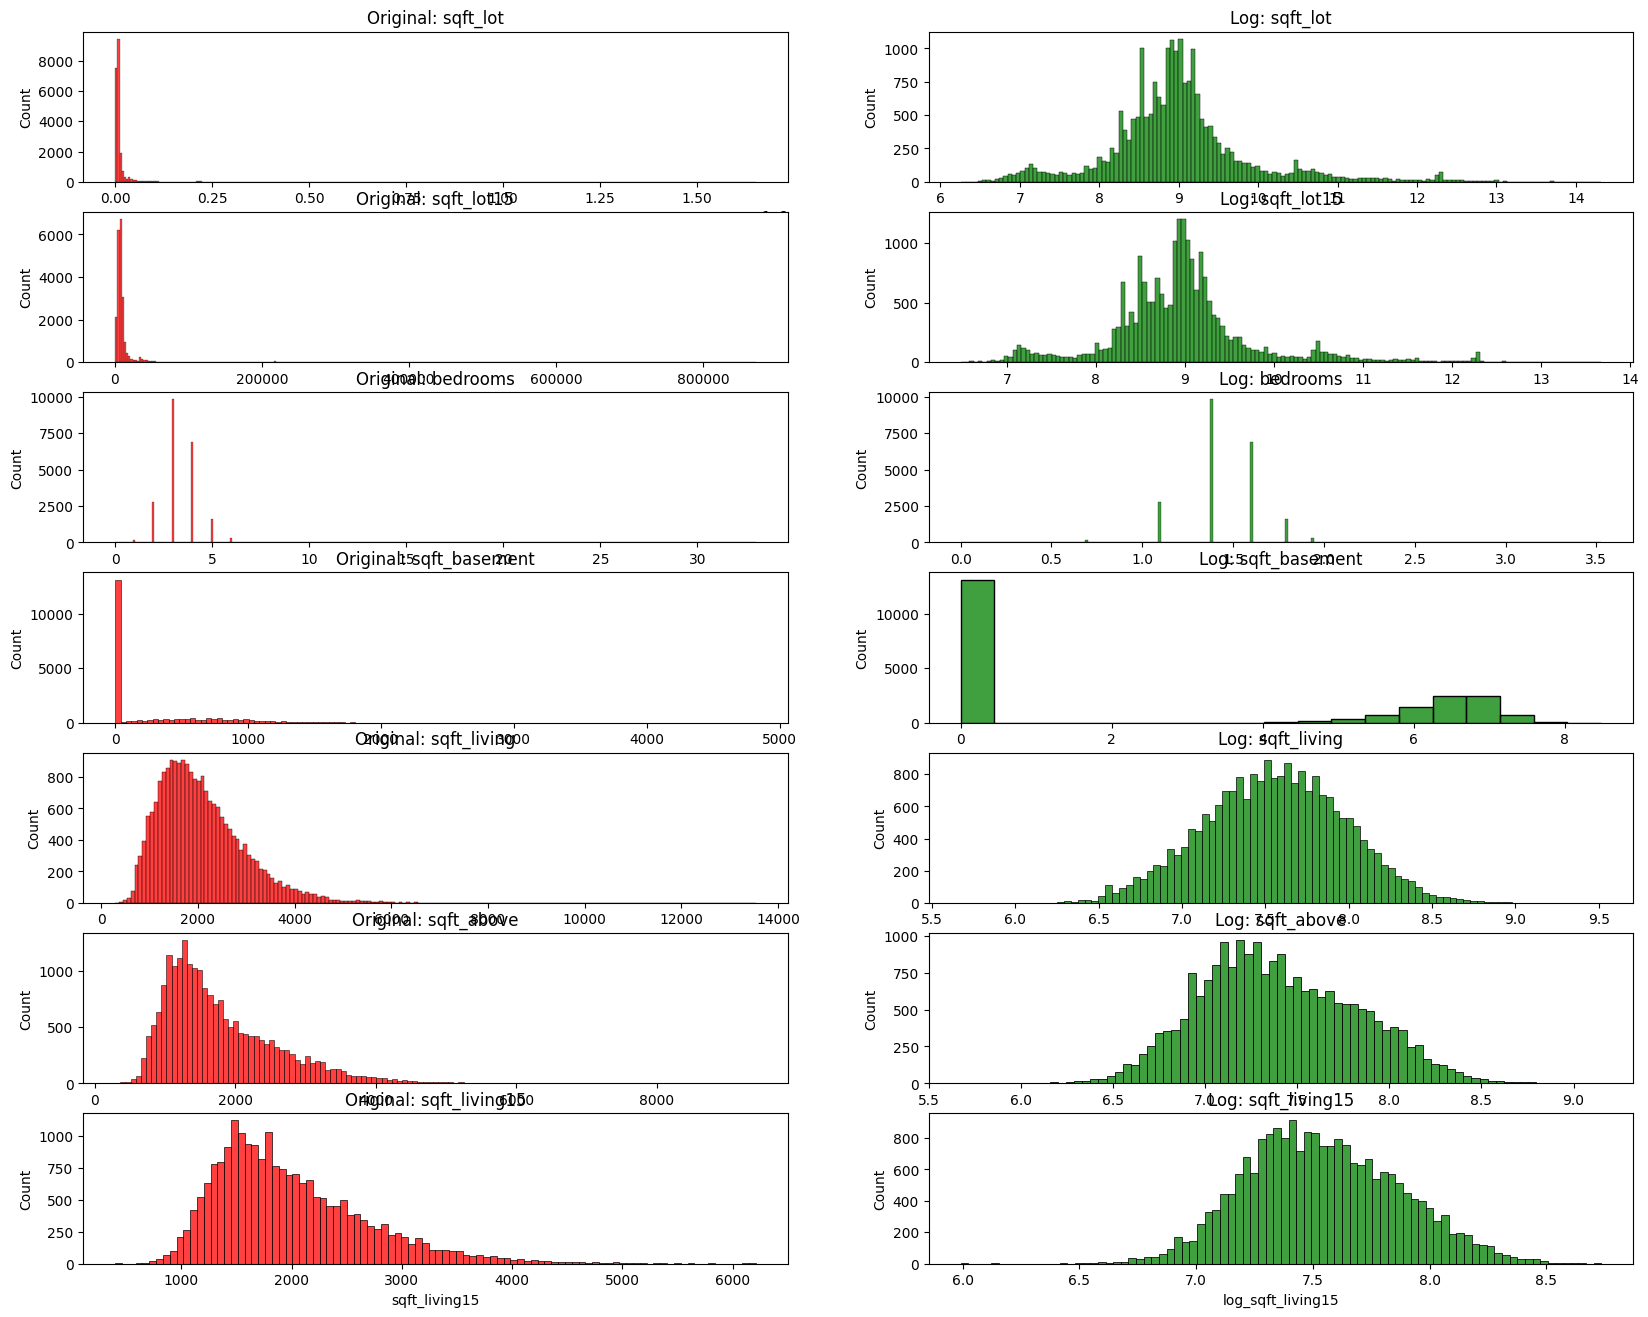

In [85]:
fig, axes = plt.subplots(7, 2, figsize = (20, 16))
axes = axes.flatten()

for i, col in enumerate(list(df_high_skewness["Name column"])):
    log_col = "log_" + col
    sns.histplot(df, x=col, ax=axes[i*2], color='red')
    sns.histplot(df, x=log_col, ax=axes[i*2+1], color='green')
    
    axes[i*2].set_title(f'Original: {col}')
    axes[i*2+1].set_title(f'Log: {col}')




### Features selection

In [86]:
categories_columns


['waterfront', 'view', 'condition', 'grade']

In [87]:
numerical_columns

['bedrooms',
 'bathrooms',
 'floors',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'yr_built']

In [88]:
features_to_drop = [
    'bedrooms', 'sqft_lot15', 'sqft_lot', 
    # có thể loại sqft_above vì có mqh hệ đa cộng tác cao với sqft_living
    'sqft_basement', 'sqft_living',  
    'sqft_above', 'sqft_living15'
]

df_cleaned = df.drop(columns=features_to_drop)
df_cleaned

,price,bathrooms,floors,waterfront,view,condition,grade,yr_built,lat,long,is_renovated,log_price,log_sqft_lot,log_sqft_lot15,log_bedrooms,log_sqft_basement,log_sqft_living,log_sqft_above,log_sqft_living15
0,221900.0,1.00,1.0,0,0,3,7,1955,47.5112,-122.257,0,12.309987,8.639588,8.639588,1.386294,0.000000,7.074117,7.074117,7.201171
1,538000.0,2.25,2.0,0,0,3,7,1951,47.7210,-122.319,1,13.195616,8.887791,8.941153,1.386294,5.993961,7.852050,7.682943,7.433075
2,180000.0,1.00,1.0,0,0,3,6,1933,47.7379,-122.233,0,12.100718,9.210440,8.995041,1.098612,0.000000,6.647688,6.647688,7.908755
3,604000.0,3.00,1.0,0,0,5,7,1965,47.5208,-122.393,0,13.311331,8.517393,8.517393,1.609438,6.814543,7.581210,6.957497,7.215975
4,510000.0,2.00,1.0,0,0,3,8,1987,47.6168,-122.045,0,13.142168,8.997271,8.923191,1.386294,0.000000,7.427144,7.427144,7.496097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,3.0,0,0,3,8,2009,47.6993,-122.346,0,12.793862,7.031741,7.319865,1.386294,0.000000,7.333676,7.333676,7.333676
21609,400000.0,2.50,2.0,0,0,3,8,2014,47.5107,-122.362,0,12.899222,8.668024,8.881975,1.609438,0.000000,7.745436,7.745436,7.512618
21610,402101.0,0.75,2.0,0,0,3,7,2009,47.5944,-122.299,0,12.904461,7.208600,7.604894,1.098612,0.000000,6.928538,6.928538,6.928538
21611,400000.0,2.50,2.0,0,0,3,8,2004,47.5345,-122.069,0,12.899222,7.778630,7.160846,1.386294,0.000000,7.378384,7.378384,7.252054


In [89]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor


In [90]:
numerical_columns = []
for i in list(df_cleaned.columns):
    if i not in categories_columns and i != "price":
        numerical_columns.append(i)

numerical_columns

['bathrooms',
 'floors',
 'yr_built',
 'lat',
 'long',
 'is_renovated',
 'log_price',
 'log_sqft_lot',
 'log_sqft_lot15',
 'log_bedrooms',
 'log_sqft_basement',
 'log_sqft_living',
 'log_sqft_above',
 'log_sqft_living15']

In [91]:
num_pipeline = Pipeline(
    [
        ("scaler", StandardScaler())
    ]
)

In [92]:
categories_columns

['waterfront', 'view', 'condition', 'grade']

In [93]:
cat_pipeline = Pipeline(
    [
        ("encoder", OrdinalEncoder())
    ]
)

In [94]:
processor = ColumnTransformer(
    [
        ("num", num_pipeline, numerical_columns)
    ],
    remainder="passthrough"
)

In [100]:
model_pipeline = Pipeline(
    [
        ("processor", processor),
        ("regresor", RandomForestRegressor())
    ]
)

In [101]:
X = df_cleaned.drop(columns=["price"])
y = df_cleaned["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14480, 18) (7133, 18) (14480,) (7133,)


In [102]:
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

410099690.51303947 807.9460507500353 0.9972610971129225


#### After processing

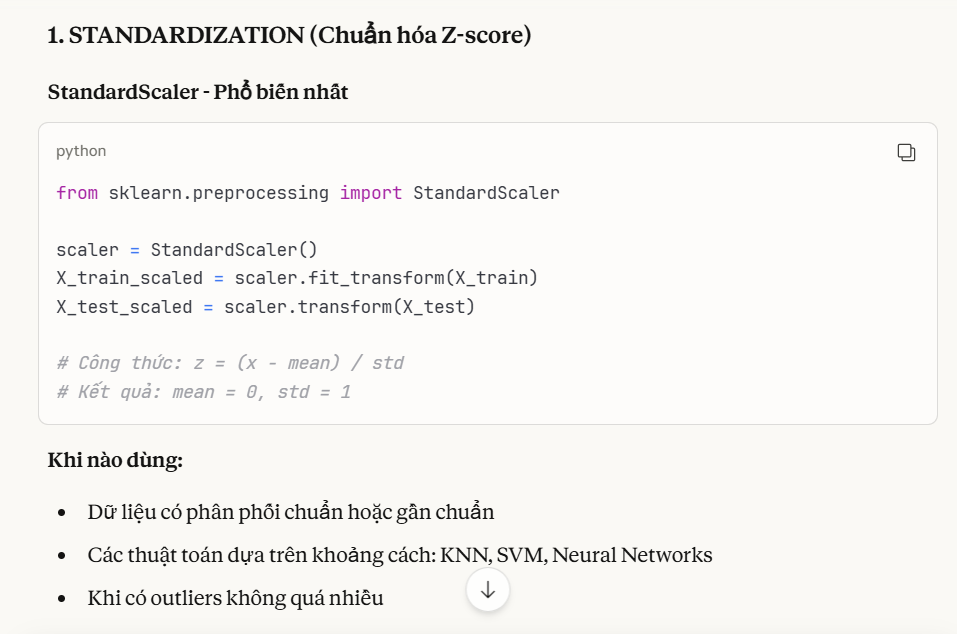
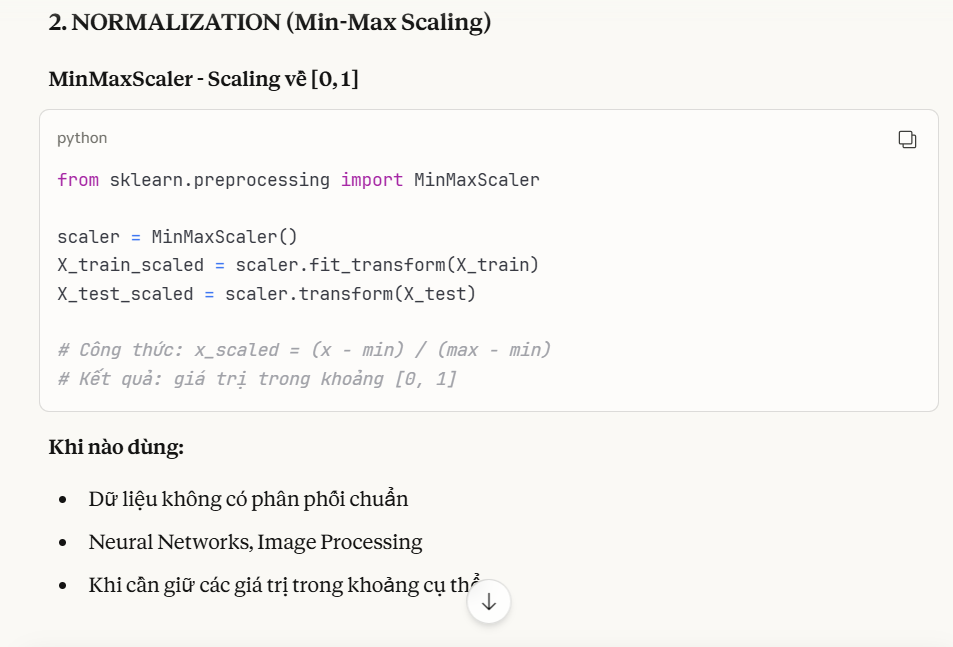
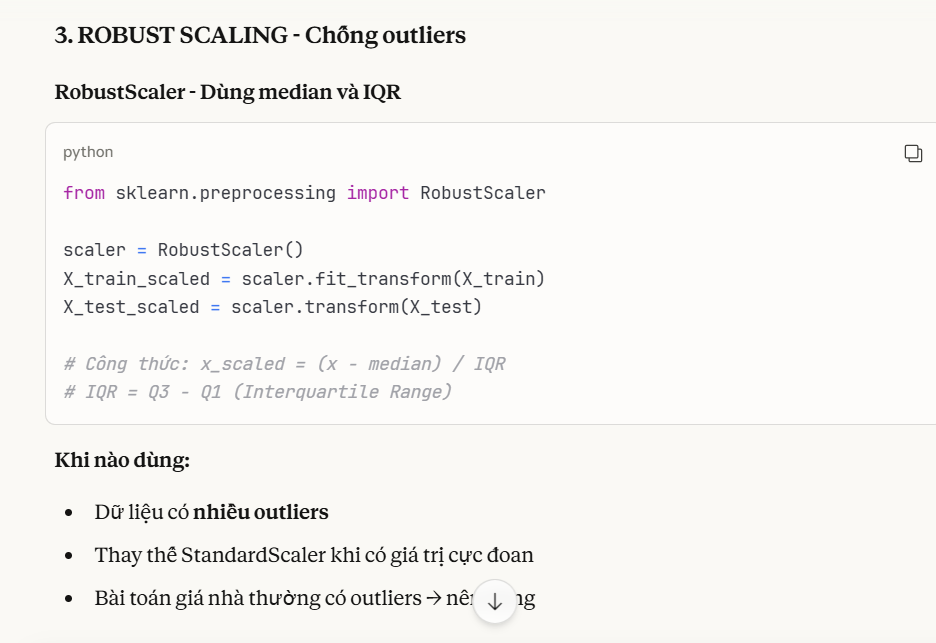